<a href="https://colab.research.google.com/github/AvishiSemwal/optimal-air-quality/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt



In [2]:

# Sample dataset with latitude and longitude
data = {
    'latitude': [28.7041, 28.5355, 28.6139, 28.4089, 28.4595, 28.7041, 28.5355, 28.6139, 28.4089, 28.4595],
    'longitude': [77.1025, 77.3910, 77.2090, 77.3178, 77.0266, 77.1025, 77.3910, 77.2090, 77.3178, 77.0266]

}

In [3]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)


In [4]:
# Display the first few rows of the dataset
print(df.head())


   latitude  longitude
0   28.7041    77.1025
1   28.5355    77.3910
2   28.6139    77.2090
3   28.4089    77.3178
4   28.4595    77.0266


In [5]:

# Assuming the dataset has columns 'latitude' and 'longitude' for sensor locations
locations = df[['latitude', 'longitude']]


In [6]:
# Define the number of clusters (sensors) you want to deploy
num_sensors = 3  # Adjust this number based on your needs


In [7]:
# Perform K-means clustering to find optimal sensor locations
kmeans = KMeans(n_clusters=num_sensors, random_state=42)
kmeans.fit(locations)



KMeans(n_clusters=3, random_state=42)

In [8]:
# Get the cluster centers (optimal sensor locations)
optimal_locations = kmeans.cluster_centers_



In [9]:
# Find the closest data points to the cluster centers
closest, _ = pairwise_distances_argmin_min(optimal_locations, locations)



In [10]:
# Get the optimal locations from the dataset
recommended_locations = locations.iloc[closest]


In [11]:
# Display the recommended locations
print("Recommended Sensor Locations:")
print(recommended_locations)



Recommended Sensor Locations:
   latitude  longitude
1   28.5355    77.3910
0   28.7041    77.1025
2   28.6139    77.2090


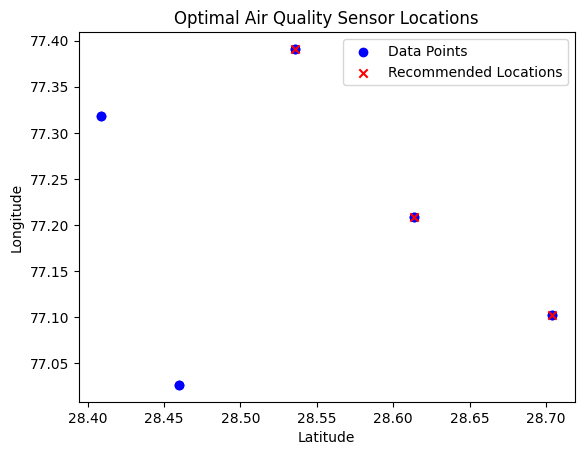

In [12]:
# Plot the data points and the recommended locations
plt.scatter(locations['latitude'], locations['longitude'], c='blue', marker='o', label='Data Points')
plt.scatter(recommended_locations['latitude'], recommended_locations['longitude'], c='red', marker='x', label='Recommended Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Optimal Air Quality Sensor Locations')
plt.show()